In [1]:
import pandas as pd
import matplotlib as plt
import descartes
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, Polygon

%matplotlib inline

In [19]:
# Ingest NYPD Arrest data
ny_crime_df = pd.read_csv('./data/NYPD_Arrest_Data__Year_to_Date_2020.csv')

# Display Results
print('Number of rows: {}'.format(ny_crime_df.shape[0]))
ny_crime_df.head()

Number of rows: 74784


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,207907186,01/14/2020,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,84,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,987042,193563,40.697970,-73.989933
1,212823662,05/08/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,933479,155881,40.594396,-74.182815
2,212367624,04/25/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,101,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,1052288,156240,40.595266,-73.755010
3,212010449,04/14/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,62,0,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE,983951,157511,40.599016,-74.001078
4,214594759,06/25/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,62,0,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE,983380,162308,40.612183,-74.003135


In [20]:
# Convert to GeoDataFrame
ny_crime_gdf = gpd.GeoDataFrame(ny_crime_df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Display Results
ny_crime_gdf.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
0,207907186,01/14/2020,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,84,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,987042,193563,40.697970,-73.989933,POINT (-73.98993 40.69797)
1,212823662,05/08/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,933479,155881,40.594396,-74.182815,POINT (-74.18282 40.59440)
2,212367624,04/25/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,101,0,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE,1052288,156240,40.595266,-73.755010,POINT (-73.75501 40.59527)
3,212010449,04/14/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,62,0,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE,983951,157511,40.599016,-74.001078,POINT (-74.00108 40.59902)
4,214594759,06/25/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,62,0,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE,983380,162308,40.612183,-74.003135,POINT (-74.00313 40.61218)


<AxesSubplot:>

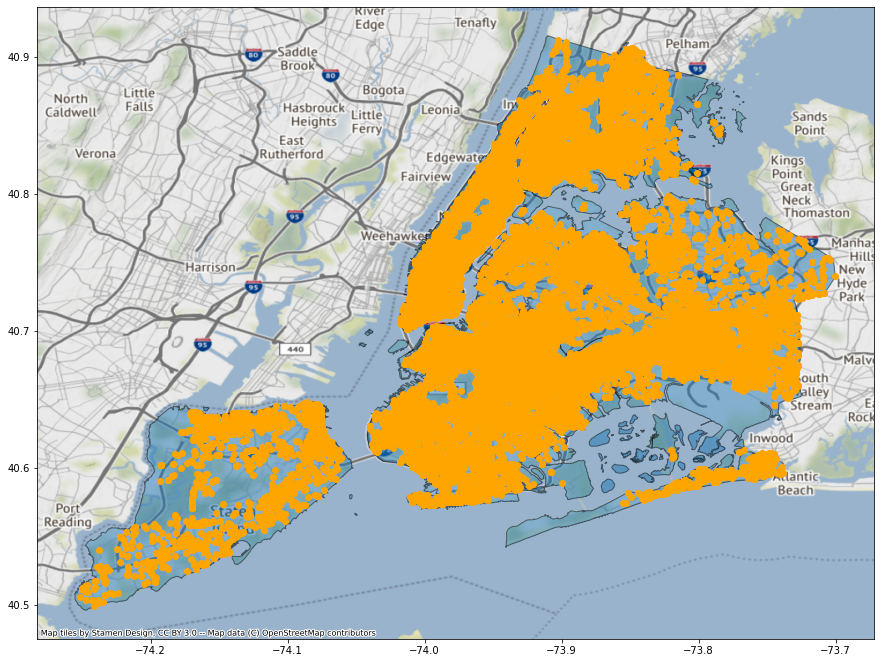

In [31]:
# Get NY Boroughs street map
nybb_map = gpd.read_file(gpd.datasets.get_path('nybb'))

# Convert NY Borough street map to 4326 CRS
nybb_map.to_crs(epsg=4326, inplace=True)

# Plot NY Boroughs street map
ax = nybb_map.plot(figsize = (15, 15), alpha=0.5, edgecolor='k')

# Add base map
ctx.add_basemap(ax, crs='EPSG:4326')

# Plot GeoDataFrame
gdf.plot(ax=ax, color='orange')